In [498]:
print('hello world!')

hello world!


In [433]:
#importing packages 
import numpy as np
import pandas as pd

In [434]:
#reading data set
df = pd.read_csv(r'C:\Users\killi\Downloads\HSA06.20221122T131126.csv')

In [435]:
#inspecting data set
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  588 non-null    object 
 1   Year             588 non-null    int64  
 2   Area             588 non-null    object 
 3   UNIT             588 non-null    object 
 4   VALUE            583 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 23.1+ KB
None


In [436]:
#counting missing values
print(df.isnull().sum())


Statistic Label    0
Year               0
Area               0
UNIT               0
VALUE              5
dtype: int64


In [437]:
#replace missing values and check
print(df.fillna(0).isnull().sum())

Statistic Label    0
Year               0
Area               0
UNIT               0
VALUE              0
dtype: int64


In [438]:
#checking how many rows and columns are in the dataset
df.shape

(588, 5)

In [439]:
#create 2 datasets for new price analysis. One for Dublin and the second for National.
df_Dub_new = df[(df['Statistic Label'].str.contains("New")) &  (df['Area']=="Dublin")].reset_index()
df_Nat_new = df[(df['Statistic Label'].str.contains("New")) &  (df['Area']=="National")].reset_index()

In [440]:
df_Dub_new.head()

,index,Statistic Label,Year,Area,UNIT,VALUE
0,1,New House Prices,1975,Dublin,Euro,13137.0
1,8,New House Prices,1976,Dublin,Euro,15342.0
2,15,New House Prices,1977,Dublin,Euro,19055.0
3,22,New House Prices,1978,Dublin,Euro,25745.0
4,29,New House Prices,1979,Dublin,Euro,32005.0


In [441]:
df_Nat_new.head()

,index,Statistic Label,Year,Area,UNIT,VALUE
0,0,New House Prices,1975,National,Euro,13254.0
1,7,New House Prices,1976,National,Euro,15564.0
2,14,New House Prices,1977,National,Euro,18754.0
3,21,New House Prices,1978,National,Euro,24082.0
4,28,New House Prices,1979,National,Euro,29387.0


In [442]:
#import matplotlib to display graphs
import matplotlib.pyplot as plt

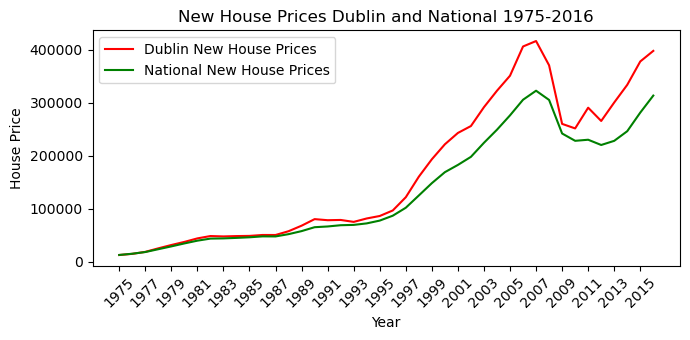

In [443]:
#plotting price of 2 new datasets
plt.plot(df_Dub_new['Year'], df_Dub_new['VALUE'], color='r', label='Dublin New House Prices')
plt.plot(df_Nat_new['Year'], df_Nat_new['VALUE'], color='g', label='National New House Prices')


plt.xlabel("Year")
plt.ylabel("House Price")
plt.title("New House Prices Dublin and National 1975-2016")


plt.legend()
plt.xticks(list(df_Dub_new['Year'].unique()[::2]), rotation=45)
plt.show()


In [444]:
#create 2 datasets for secondhand price analysis. One for Dublin and the second for National.
df_Dub_second = df[(df['Statistic Label'].str.contains("Second")) &  (df['Area']=="Dublin")].reset_index()
df_Nat_second = df[(df['Statistic Label'].str.contains("Second")) &  (df['Area']=="National")].reset_index()

In [445]:
df_Dub_second.head()

,index,Statistic Label,Year,Area,UNIT,VALUE
0,295,Second Hand House Prices,1975,Dublin,Euro,12774.0
1,302,Second Hand House Prices,1976,Dublin,Euro,15850.0
2,309,Second Hand House Prices,1977,Dublin,Euro,18778.0
3,316,Second Hand House Prices,1978,Dublin,Euro,22920.0
4,323,Second Hand House Prices,1979,Dublin,Euro,30092.0


In [446]:
df_Nat_second.head()

,index,Statistic Label,Year,Area,UNIT,VALUE
0,294,Second Hand House Prices,1975,National,Euro,12478.0
1,301,Second Hand House Prices,1976,National,Euro,15303.0
2,308,Second Hand House Prices,1977,National,Euro,17925.0
3,315,Second Hand House Prices,1978,National,Euro,21895.0
4,322,Second Hand House Prices,1979,National,Euro,27598.0


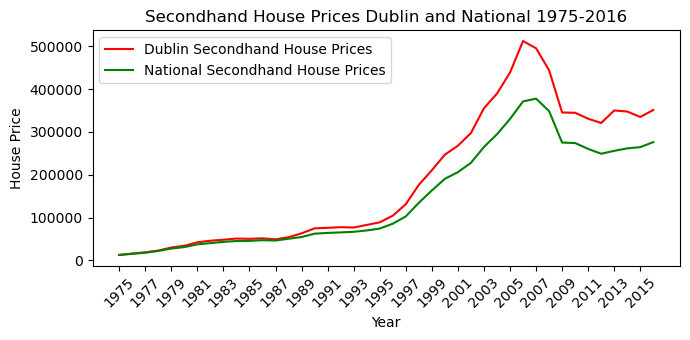

In [447]:
#plotting price of 2 new datasets
plt.plot(df_Dub_second['Year'], df_Dub_second['VALUE'], color='r', label='Dublin Secondhand House Prices')
plt.plot(df_Nat_second['Year'], df_Nat_second['VALUE'], color='g', label='National Secondhand House Prices')


plt.xlabel("Year")
plt.ylabel("House Price")
plt.title("Secondhand House Prices Dublin and National 1975-2016")
plt.xticks(list(df_Dub_second['Year'].unique()[::2]), rotation=45)

plt.legend()
plt.show()

In [448]:
# check new house price correlation
df_Dub_new['VALUE'].corr(df_Nat_new['VALUE'], method='pearson')

0.9957710223924618

In [449]:
# check secondhand price correlation
df_Dub_second['VALUE'].corr(df_Nat_second['VALUE'], method='pearson')

0.9989860995914884

In [450]:
#The graphs show that new and second hand house prices are strongly correlated.
#To measure the actual correlation we can use thePearson correlation measure. 
#This measures the strength of the linear relationship between two variables

In [451]:
#I will examine more data and plot it beside both of these graphs 
#importing csv file 'House Construction Cost Index'
df2 = pd.read_csv(r'C:\Users\killi\Downloads\HSA09.20221123T171128.csv')

In [452]:
#look at shape of dataframe 2 ('House Construction Cost Index')
df2.shape

(42, 5)

In [453]:
df2.head()

,STATISTIC Label,Year,State,UNIT,VALUE
0,House Construction Cost Index,1975,State,Base Jan 1991=100,20.0
1,House Construction Cost Index,1976,State,Base Jan 1991=100,22.9
2,House Construction Cost Index,1977,State,Base Jan 1991=100,26.9
3,House Construction Cost Index,1978,State,Base Jan 1991=100,29.6
4,House Construction Cost Index,1979,State,Base Jan 1991=100,34.2


In [454]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  42 non-null     object 
 1   Year             42 non-null     int64  
 2   State            42 non-null     object 
 3   UNIT             42 non-null     object 
 4   VALUE            42 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.8+ KB


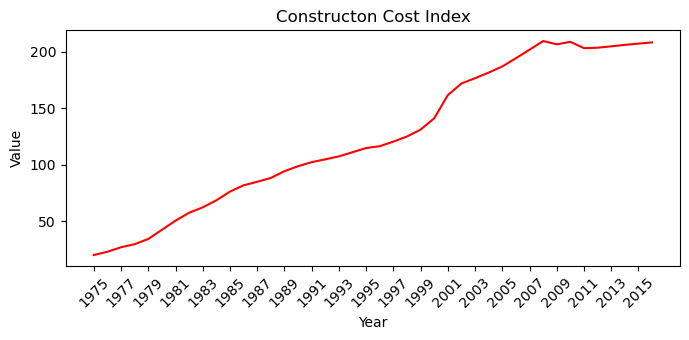

In [455]:
#plotting this
plt.plot(df2['Year'], df2['VALUE'], color='r')
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Constructon Cost Index")
plt.xticks(list(df2['Year'].unique()[::2]), rotation=45)

plt.show()

In [456]:
#going to scrape inflation data from internet
import requests
import time
from bs4 import BeautifulSoup

In [457]:
world_data = 'https://www.worlddata.info/europe/ireland/inflation-rates.php#:~:text=During%20the%20observation%20period%20from,year%20inflation%20rate%20was%208.2%25.'

In [458]:
page = requests.get(world_data)

In [459]:
soup = BeautifulSoup(page.text, 'lxml')

In [460]:
#i got the html, now I will get the table im looking for

In [461]:
table = soup.find('table', {'class' : "std100 hover"})

In [462]:
headers = []

In [463]:
for i in table.find_all('th'):
    title = i.text.strip()
    headers.append(title)


In [464]:
inflation = pd.DataFrame(columns = headers)

In [465]:
for row in table.find_all('tr')[1:]:
    data = row.find_all('td')
    row_data = [td.text.strip() for td in data]
    length = len(inflation)
    inflation.loc[length] = row_data
    

In [466]:
print(inflation)

    Year  Ireland    Ø EU   Ø USA Ø World
0   2021   2.36 %  2.55 %  4.70 %  3.42 %
1   2020  -0.33 %  0.50 %  1.23 %  1.92 %
2   2019   0.94 %  1.63 %  1.81 %  2.19 %
3   2018   0.49 %  1.74 %  2.44 %  2.44 %
4   2017   0.34 %  1.43 %  2.13 %  2.19 %
..   ...      ...     ...     ...     ...
57  1964   6.72 %  3.42 %  1.28 %     n/a
58  1963   2.45 %  2.92 %  1.24 %     n/a
59  1962   4.26 %  3.55 %  1.20 %     n/a
60  1961   2.76 %  2.08 %  1.07 %     n/a
61  1960   0.45 %  1.74 %  1.46 %     n/a

[62 rows x 5 columns]


In [467]:
#stripping % signs so it will graph properly
inflation['Ireland'] = [x.strip('%') for x in inflation['Ireland']]

In [468]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     62 non-null     object
 1   Ireland  62 non-null     object
 2   Ø EU     62 non-null     object
 3   Ø USA    62 non-null     object
 4   Ø World  62 non-null     object
dtypes: object(5)
memory usage: 2.9+ KB


In [469]:
print(inflation)



    Year Ireland    Ø EU   Ø USA Ø World
0   2021   2.36   2.55 %  4.70 %  3.42 %
1   2020  -0.33   0.50 %  1.23 %  1.92 %
2   2019   0.94   1.63 %  1.81 %  2.19 %
3   2018   0.49   1.74 %  2.44 %  2.44 %
4   2017   0.34   1.43 %  2.13 %  2.19 %
..   ...     ...     ...     ...     ...
57  1964   6.72   3.42 %  1.28 %     n/a
58  1963   2.45   2.92 %  1.24 %     n/a
59  1962   4.26   3.55 %  1.20 %     n/a
60  1961   2.76   2.08 %  1.07 %     n/a
61  1960   0.45   1.74 %  1.46 %     n/a

[62 rows x 5 columns]


In [470]:
#reversing order of dataframe as i wanted to start from 1960
inflation = inflation[::-1]
print(inflation)

    Year Ireland    Ø EU   Ø USA Ø World
61  1960   0.45   1.74 %  1.46 %     n/a
60  1961   2.76   2.08 %  1.07 %     n/a
59  1962   4.26   3.55 %  1.20 %     n/a
58  1963   2.45   2.92 %  1.24 %     n/a
57  1964   6.72   3.42 %  1.28 %     n/a
..   ...     ...     ...     ...     ...
4   2017   0.34   1.43 %  2.13 %  2.19 %
3   2018   0.49   1.74 %  2.44 %  2.44 %
2   2019   0.94   1.63 %  1.81 %  2.19 %
1   2020  -0.33   0.50 %  1.23 %  1.92 %
0   2021   2.36   2.55 %  4.70 %  3.42 %

[62 rows x 5 columns]


In [471]:
inflation["Ireland"] = inflation.Ireland.astype(float)
inflation["Year"] = inflation.Year.astype(float)

In [472]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 61 to 0
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     62 non-null     float64
 1   Ireland  62 non-null     float64
 2   Ø EU     62 non-null     object 
 3   Ø USA    62 non-null     object 
 4   Ø World  62 non-null     object 
dtypes: float64(2), object(3)
memory usage: 2.9+ KB


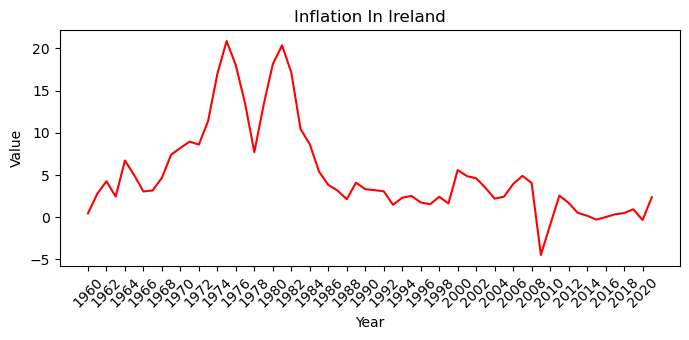

In [473]:
#plotting inflation
plt.plot(inflation['Year'], inflation['Ireland'], color='r')
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Inflation In Ireland")
plt.xticks(list(inflation['Year'].unique()[::2]), rotation=45)
plt.show()

In [474]:
from datetime import date

In [475]:
#loading in new dataset 
gdp_per_capita = pd.read_csv(r'C:\Users\killi\Downloads\ireland-gdp-per-capita.csv')

In [476]:
gdp_per_capita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     62 non-null     int64  
 1    GDP Per Capita (US $)   62 non-null     float64
 2    Annual Growth Rate (%)  61 non-null     float64
 3                            0 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 2.1 KB


In [477]:
gdp_per_capita.shape

(62, 4)

In [478]:
gdp_per_capita.head()

,date,GDP Per Capita (US $),Annual Growth Rate (%),
0,1960,685.6147,NaN,NaN
1,1961,739.2764,7.83,NaN
2,1962,797.0063,7.81,NaN
3,1963,852.1353,6.92,NaN
4,1964,965.1354,13.26,NaN


In [479]:
#i didnt realise there was a space at the start and i didnt know why nothing would work with the GDP per capita column
gdp_per_capita.get(' GDP Per Capita (US $)', default="no_country")

0       685.6147
1       739.2764
2       797.0063
3       852.1353
4       965.1354
         ...    
57    69774.0290
58    79107.6050
59    80886.6157
60    85422.5429
61    99152.1026
Name:  GDP Per Capita (US $), Length: 62, dtype: float64

In [480]:
#multiplied dollar by euro exchange rate
gdp_per_capita[' GDP Per Capita (US $)'] = gdp_per_capita[' GDP Per Capita (US $)'].mul(0.95)

In [481]:
print(gdp_per_capita['date'])


0     1960
1     1961
2     1962
3     1963
4     1964
      ... 
57    2017
58    2018
59    2019
60    2020
61    2021
Name: date, Length: 62, dtype: int64


In [482]:
print(gdp_per_capita)

    date   GDP Per Capita (US $)   Annual Growth Rate (%)    
0   1960              651.333965                      NaN NaN
1   1961              702.312580                     7.83 NaN
2   1962              757.155985                     7.81 NaN
3   1963              809.528535                     6.92 NaN
4   1964              916.878630                    13.26 NaN
..   ...                     ...                      ...  ..
57  2017            66285.327550                    11.00 NaN
58  2018            75152.224750                    13.38 NaN
59  2019            76842.284915                     2.25 NaN
60  2020            81151.415755                     5.61 NaN
61  2021            94194.497470                    16.07 NaN

[62 rows x 4 columns]


In [483]:
#i changed the name of the column to make it easier for myself
gdp_per_capita.rename(columns = {' GDP Per Capita (US $)':'GDP'}, inplace = True)

In [484]:
print(gdp_per_capita['date'])

0     1960
1     1961
2     1962
3     1963
4     1964
      ... 
57    2017
58    2018
59    2019
60    2020
61    2021
Name: date, Length: 62, dtype: int64


In [485]:
gdp_per_capita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     62 non-null     int64  
 1   GDP                      62 non-null     float64
 2    Annual Growth Rate (%)  61 non-null     float64
 3                            0 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 2.1 KB


Text(0.5, 1.0, 'GDP Per Capita 1960-2021')

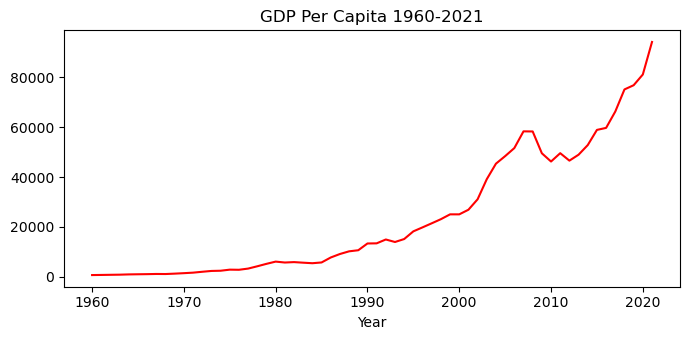

In [486]:
#plotting gdp per capita
plt.plot(gdp_per_capita['date'], gdp_per_capita['GDP'], color='r',)
plt.xlabel("Year")
plt.title("GDP Per Capita 1960-2021")


In [487]:
df_Dub_second.head()

,index,Statistic Label,Year,Area,UNIT,VALUE
0,295,Second Hand House Prices,1975,Dublin,Euro,12774.0
1,302,Second Hand House Prices,1976,Dublin,Euro,15850.0
2,309,Second Hand House Prices,1977,Dublin,Euro,18778.0
3,316,Second Hand House Prices,1978,Dublin,Euro,22920.0
4,323,Second Hand House Prices,1979,Dublin,Euro,30092.0


In [488]:
df_Dub_second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            42 non-null     int64  
 1   Statistic Label  42 non-null     object 
 2   Year             42 non-null     int64  
 3   Area             42 non-null     object 
 4   UNIT             42 non-null     object 
 5   VALUE            42 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.1+ KB


In [489]:
#getting rid of rows so i could plot with house prices
inflation2 = inflation.iloc[15:-5]

In [490]:
print(inflation2)

      Year  Ireland     Ø EU    Ø USA  Ø World
46  1975.0    20.88  10.47 %   9.14 %      n/a
45  1976.0    17.99   9.35 %   5.74 %      n/a
44  1977.0    13.47   9.77 %   6.50 %      n/a
43  1978.0     7.71   7.76 %   7.63 %      n/a
42  1979.0    13.30   8.22 %  11.25 %      n/a
41  1980.0    18.15  12.91 %  13.55 %  13.98 %
40  1981.0    20.37  11.77 %  10.33 %  12.47 %
39  1982.0    17.15   9.58 %   6.13 %  10.24 %
38  1983.0    10.45   8.67 %   3.21 %   8.77 %
37  1984.0     8.65   7.67 %   4.30 %   8.12 %
36  1985.0     5.40   5.40 %   3.55 %   6.86 %
35  1986.0     3.83   3.68 %   1.90 %   5.82 %
34  1987.0     3.16   4.02 %   3.66 %   5.76 %
33  1988.0     2.13   4.54 %   4.08 %   7.15 %
32  1989.0     4.09   6.26 %   4.83 %   7.00 %
31  1990.0     3.32   6.15 %   5.40 %   8.13 %
30  1991.0     3.21   5.48 %   4.23 %   9.00 %
29  1992.0     3.07   6.22 %   3.03 %   7.71 %
28  1993.0     1.47   4.85 %   2.95 %   7.51 %
27  1994.0     2.31   4.72 %   2.61 %  10.32 %
26  1995.0   

In [491]:
inflation2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 46 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     42 non-null     float64
 1   Ireland  42 non-null     float64
 2   Ø EU     42 non-null     object 
 3   Ø USA    42 non-null     object 
 4   Ø World  42 non-null     object 
dtypes: float64(2), object(3)
memory usage: 2.0+ KB


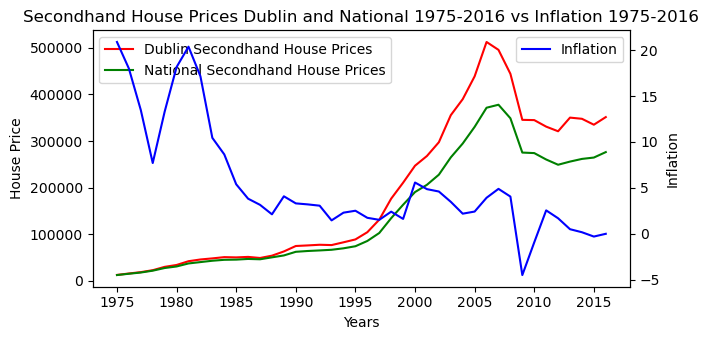

In [492]:
fig, ax1 = plt.subplots()
ax1.plot(df_Dub_second['Year'], df_Dub_second['VALUE'], color='r', label='Dublin Secondhand House Prices')
ax1.plot(df_Nat_second['Year'], df_Nat_second['VALUE'], color='g', label='National Secondhand House Prices')
ax2 = ax1.twinx()
ax2.plot(inflation2['Year'], inflation2['Ireland'], color='b', label='Inflation')
plt.xticks(list(inflation2['Year'].unique()[::5]), rotation=45)

ax1.set_xlabel('Years')
ax1.set_ylabel('House Price')
ax2.set_ylabel('Inflation')
plt.title("Secondhand House Prices Dublin and National 1975-2016 vs Inflation 1975-2016")
ax1.legend(loc = 0)
ax2.legend(loc = 1)

In [493]:
#getting rid of rows to plot with house prices
gdp_per_capita2 = gdp_per_capita.iloc[15:-5]

In [494]:
print(gdp_per_capita2)

    date           GDP   Annual Growth Rate (%)    
15  1975   2824.730095                    18.14 NaN
16  1976   2773.603945                    -1.81 NaN
17  1977   3255.719730                    17.38 NaN
18  1978   4179.987460                    28.39 NaN
19  1979   5158.463900                    23.41 NaN
20  1980   6053.815910                    17.36 NaN
21  1981   5686.846395                    -6.06 NaN
22  1982   5852.606385                     2.91 NaN
23  1983   5619.479710                    -3.98 NaN
24  1984   5407.426030                    -3.77 NaN
25  1985   5711.148725                     5.62 NaN
26  1986   7706.562830                    34.94 NaN
27  1987   9102.817445                    18.12 NaN
28  1988  10180.076785                    11.83 NaN
29  1989  10617.025770                     4.29 NaN
30  1990  13329.737470                    25.55 NaN
31  1991  13382.847030                     0.40 NaN
32  1992  14928.665465                    11.55 NaN
33  1993  13

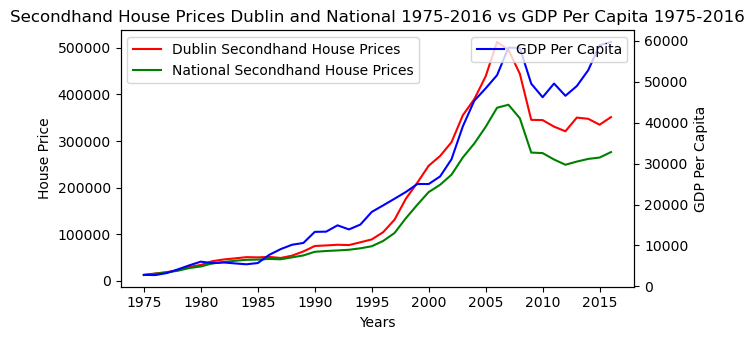

In [495]:
fig, ax1 = plt.subplots()
ax1.plot(df_Dub_second['Year'], df_Dub_second['VALUE'], color='r', label='Dublin Secondhand House Prices')
ax1.plot(df_Nat_second['Year'], df_Nat_second['VALUE'], color='g', label='National Secondhand House Prices')
ax2 = ax1.twinx()
ax2.plot(gdp_per_capita2['date'], gdp_per_capita2['GDP'], color='b', label='GDP Per Capita')
plt.xticks(list(df_Dub_second['Year'].unique()[::5]), rotation=45)

ax1.set_xlabel('Years')
ax1.set_ylabel('House Price')
ax2.set_ylabel('GDP Per Capita')
plt.title("Secondhand House Prices Dublin and National 1975-2016 vs GDP Per Capita 1975-2016")
ax1.legend(loc = 0)
ax2.legend(loc = 1)

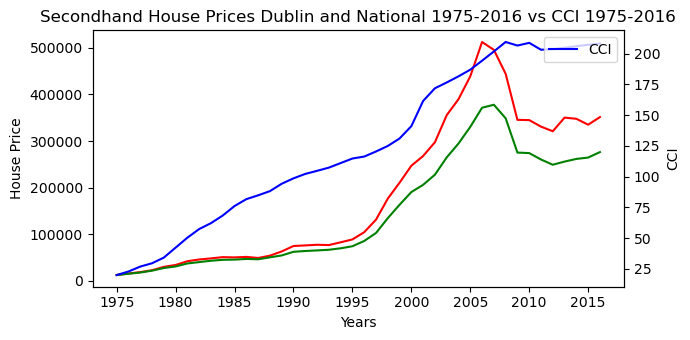

In [496]:
fig, ax1 = plt.subplots()
ax1.plot(df_Dub_second['Year'], df_Dub_second['VALUE'], color='r', label='Dublin Secondhand House Prices')
ax1.plot(df_Nat_second['Year'], df_Nat_second['VALUE'], color='g', label='National Secondhand House Prices')
ax2 = ax1.twinx()
ax2.plot(df2['Year'], df2['VALUE'], color='b', label = 'CCI')
plt.xticks(list(df_Dub_second['Year'].unique()[::5]), rotation=45)

ax1.set_xlabel('Years')
ax1.set_ylabel('House Price')
ax2.set_ylabel('CCI')
plt.title("Secondhand House Prices Dublin and National 1975-2016 vs CCI 1975-2016")
ax2.legend(loc = 1)

In [497]:
#measuring correlation
df_Dub_second['VALUE'].corr(gdp_per_capita2['GDP'], method='pearson')

0.6809322065530344